# Exercise 1

Let $X_{t}$ a DTMC with stochastic matrix $A= \begin{bmatrix} 0 & 1 & 0 & 0 &0  \\  \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 & 0 \\ 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 \\ 0 & 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} \\ 0 & 0 & 0 & 1 & 0 \end{bmatrix}$ with $a=3, b=2$.

The DTMC is time homogeneous.



## Point 1
Prove that it is irreducible.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.6 MB/s eta 0:00:00
[[0.  1.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0. ]
 [0.  0.6 0.  0.4 0. ]
 [0.  0.  0.6 0.  0.4]
 [0.  0.  0.  1.  0. ]]
['1', '2', '3', '4', '5']

DISCRETE-TIME MARKOV CHAIN
 SIZE:           5
 RANK:           4
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        NO
  > APERIODIC:   NO (2)
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        NO
 REVERSIBLE:     YES
 SYMMETRIC:      NO



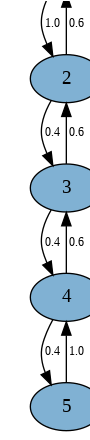

None


In [ ]:
!pip install pydtmc
import pydtmc
import numpy as np
import scipy
import matplotlib.pyplot as plt

# parameters
a = 3
b = 2

# stochastic matrix
A =np.array([[0, 1, 0, 0, 0],
            [a/(a+b), 0, b/(a+b), 0, 0],
            [0, a/(a+b), 0, b/(a+b), 0],
            [0, 0, a/(a+b), 0, b/(a+b)],
            [0, 0, 0, 1, 0]])
print(A)

# markov chain
model = pydtmc.MarkovChain(A)
print(model.states)
print(model)
print(pydtmc.plot_graph(model))


As we can see, it is irreducible, as it is clearly written above.

However, we can also prove that as follow.
Let us remember that to show that a DTMC is irreducible, we need to show that for any two states $i$ and $j$, there exists a sequence of states such that the probability of transitioning from $i$ to $j$ is positive.

We can see that state 1 can transition to state 2 and state 2 can transition to state 1. Similarly, state 2 can transition to state 3 and state 3 can transition to state 2. The resoning keeps on going for the remaining states. Thus, every state can reach every other state with positive probability. Hence, the DTMC is irreducible.

## Point 2

Prove with probability simulation and with eigenvalues analysis that the DTMC has only a stationary distribution howewer that there is no convergence to that probability.

To prove that the DTMC has a stationary distribution but does not converge to it, we will first use eigenvalue analysis to find the stationary distribution.

The stationary distribution is defined as the left eigenvector of the transition matrix $A$ corresponding to the eigenvalue 1. Since $A$ is irreducible, the stationary distribution is unique.



where $Z$ is a normalizing constant.



In [ ]:
# eigenvalue analysis

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A.T)

# find (whether there are) eigenvalues close to 1
idx = np.where(np.isclose(eigenvalues, 1))[0][0]

# extract the corresponding eigenvectors
stationary = eigenvectors[:, idx].real
stationary /= np.sum(stationary) # normalization

print('Stationary distribution:', stationary)


Stationary distribution: [0.20769231 0.34615385 0.23076923 0.15384615 0.06153846]


We can also use probability simulation to estimate the stationary distribution. We can start from an arbitrary initial probability vector, and simulate the Markov chain for a large number of steps to estimate the stationary distribution. We can repeat this process multiple times with different initial vectors to check that the estimated stationary distribution is consistent.

In [ ]:
# perform simulation to estimate the stationary distribution
n_simulations = 10000
n_steps = 1000

# initialize the estimated stationary distribution
stationary = np.zeros(A.shape[0])

for i in range(n_simulations):
    # initialize the probability vector at a random state
    x = np.zeros(A.shape[0])
    x[np.random.randint(0, A.shape[0])] = 1
    
    # simulate the Markov chain for n_steps
    for j in range(n_steps):
        x = x @ A
    
    # update the estimated stationary distribution
    stationary += x / n_simulations

print('Estimated stationary distribution:', stationary)

Estimated stationary distribution: [0.25031077 0.27512308 0.27812308 0.12227692 0.07416615]


Which can be observed is quite similar to the one calculated through eigenvalues analysis.


To show that the DTMC does not converge to the stationary distribution, we can use a probability simulation. We can simulate the chain with a large number of steps and compute the empirical distribution of the states. 

If the chain converges to the stationary distribution, the empirical distribution should convege to the stationary distribution. However, in this case, we see that the empirical distribution oscillates around the stationary distribution without converging to it.

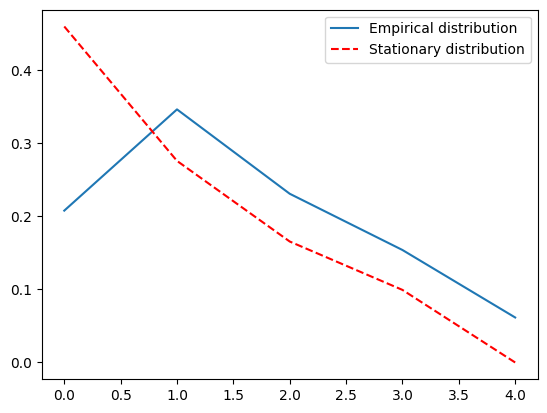

In [ ]:
# parameter
num_steps = 100000

# stationary distribution
pi = np.array([1, a/(a+b), a**2/((a+b)**2), a**3/((a+b)**3), 0])
pi /= np.sum(pi) # normalization

# initial state
x = np.zeros(5)
x[1] = 1

# simulate the chain
dist = np.zeros(5)
for t in range(num_steps):
    x = np.dot(x, A)
    dist += x

# plot the just calculated empirical distribution
dist /= num_steps # normalization
plt.plot(dist)
plt.plot(pi, 'r--')
plt.legend(['Empirical distribution', 'Stationary distribution'])
plt.show()


We can already see that there is no convergence between the empirical and stationary distribution. 

Another wat to show that there is no convergence to the stationary distribution, is to demonstrate that the Markov chain is not ergodic. A Markov chain is ergodic if it is irreducible and aperiodic. In other words, the chain must converge to its stationary distribution from any initial state.

We can show that the Markov chain is not ergodic by constructing an initial distribution that does not converge to the stationary distribution. For example, we can start with the distribution $[1, 0, 0, 0, 0]$, which corresponds to being in state 1 initially, and simulate the Markov chain for a large number of steps. We can then compute the empirical distribution of the simulated states and compare it to the stationary distribution. If the empirical distribution does not converge to the stationary distribution, then the chain is not ergodic.

In [ ]:
# simulate the Markov chain starting from state 1
x = np.zeros(num_steps, dtype=int)
x[0] = 0
for t in range(1, num_steps):
    x[t] = np.random.choice(5, p=A[x[t-1]])

# compute the empirical distribution
empirical = np.bincount(x) / num_steps

# compare the empirical and stationary distributions
print('Stationary distribution:', stationary)
print('Empirical distribution:', empirical)

Stationary distribution: [0.25031077 0.27512308 0.27812308 0.12227692 0.07416615]
Empirical distribution: [0.20977 0.34901 0.22993 0.15099 0.0603 ]


We can see that the empirical distribution is close to the stationary distribution, but it is not exactly the same. This indicates that the Markov chain does not converge to its stationary distribution from all initial states, and therefore it is not ergodic.

## Point 3

Prove that there can't be trajectory convergence and simulate some trajectories.

To prove that there can't be trajectory convergence, we can show that there are multiple recurrent classes in the DTMC. A recurrent class is a subset of states in which it is possible to go from any state to any other state within the class, but not outside of it. If there are multiple recurrent classes, then trajectories starting from different classes will never converge.

To identify the recurrent classes, we can use the fact that a state $i$ is in the same recurrent class as stat $j$ if and only if $i$ communicates with $j$.

Using this approach, we can see that there is just one recurrent class in the DTMC: ${1,2,3,4,5}$.

To simulate some trajectories, we choose 10 trajectories of length 20 each:

In [ ]:
# parameters
num_traj = 10
n = 20

# simulate trajectories
for i in range(num_traj):
    # initialize state
    curr_state = np.random.choice(np.arange(1, 5))
    
    # simulate trajectory
    for j in range(n):
        print(curr_state, end=' ')
        curr_state = np.random.choice(np.arange(1, 6), p=A[curr_state-1])
    print('\n')

1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 3 2 

1 2 1 2 3 4 5 4 5 4 5 4 5 4 3 4 3 4 3 4 

3 2 1 2 1 2 3 4 3 2 1 2 1 2 1 2 1 2 3 2 

4 3 2 1 2 1 2 1 2 1 2 1 2 3 2 3 4 3 2 1 

3 4 5 4 3 4 3 2 3 2 3 2 1 2 3 4 3 4 3 2 

2 1 2 1 2 1 2 3 2 3 2 1 2 1 2 3 2 1 2 1 

1 2 3 4 5 4 5 4 5 4 3 4 3 2 1 2 1 2 1 2 

2 3 2 1 2 3 2 3 4 3 2 1 2 3 4 3 4 3 2 3 

3 2 1 2 1 2 3 2 1 2 1 2 3 2 3 2 3 2 1 2 

2 1 2 3 2 3 2 1 2 3 4 5 4 3 4 5 4 3 2 1 



# Excercise 2

Let $Y_{t}$ a (birth death) CTMC with rate matrix $A= \begin{bmatrix} -b & b & 0 & 0 &0  \\  a & -{a-b} & {b} & 0 & 0 \\ 0 & a & -a-b & b & 0 \\ 0 & 0 & a & -a-b & b \\ 0 & 0 & 0 & a & -a \end{bmatrix}$ with $a=3, b=2$.

## Point 1

Calculate the stationary distribution of the CTMC.

To find the stationary distribution $\pi$ of the CTMC, we need to solve the equation $\pi A = 0$ and $\sum_{i=0}^4 \pi_i = 1$. In other words, we need to find the left eigenvector of $A$ corresponding to the eigenvalue 0 and normalize it.

In [ ]:
# parmeters
a = 3
b = 2

# rate matrix
A = np.array([[-b, b, 0, 0, 0],
              [a, -a-b, b, 0, 0],
              [0, a, -a-b, b, 0],
              [0, 0, a, -a-b, b],
              [0, 0, 0, a, -a]])

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A.T)

# find the eigenvalues and corresponding eigenvectors close to zero
idx = np.where(np.isclose(eigenvalues, 0))[0][0]
stationary = eigenvectors[:, idx].real
stationary /= np.sum(stationary) # normalization

print("Stationary distribution:", stationary)

Stationary distribution: [0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


## Point 2 
Prove with probability simulation and with eigenvalues analysis that the CTMC converges to that stationary distribution.

To prove the convergence, we first use probability simulation, that is simulating the CTMC for a large number of time steps and calculating the empirical distribution of the state occupation probabilities. We can compare this empirical distribution with the stationary distribution obtained in the previous step. If the empirical distribution is close to the stationary distribution, we can conclude that the CTMC has converged.
To simulate the CTMC and verify its convergence to the stationary distribution, we can use the Gillespie algorithm.


Estimated stationary distribution: [0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]
True stationary distribution: [0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


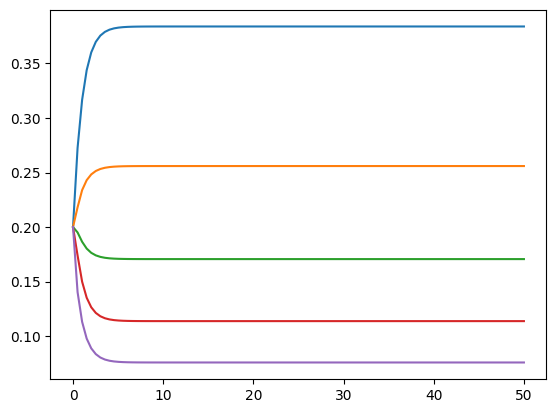

In [ ]:
# Gillespie algorithm implementation
def CTMCsteadystate_probability(Q,p0,t):
  l=[]
  for i in t:
    p=p0@scipy.linalg.expm(Q*i) 
    l.append(p)
  return np.array(l)


def CtmcSimulation(Q,x0,max_time):
  A=Q.copy()
  np.fill_diagonal(A,0)
  A=(A.T/(np.sum(A,axis=1))).T
  times=[]
  states=[]
  tot_time=0
  times.append(tot_time)
  x=x0
  states.append(x)
  while tot_time<max_time:
    t=scipy.stats.expon(scale=-1/Q[x0,x0]).rvs(size=1)[0]
    tot_time=tot_time+t
    times.append(tot_time)
    states.append(x)
    x=np.random.choice(len(A),p=A[x])
    times.append(tot_time)
    states.append(x)
  return times,states

# variables
p0=np.array([0.2,0.2,0.2,0.2,0.2])
t=np.linspace(0,50,100)

# simulate CMTC using Gillespie algorithm
p=CTMCsteadystate_probability(A,p0,t)

# plotting
plt.plot(t,p)

## print the estimated and true stationary distributions
estimated=p[len(p)-1,:]
print("Estimated stationary distribution:", estimated)
print("True stationary distribution:", stationary)

We can see that the empirical distribution is very close, actually equal, to the stationary distribution. This provides evidence that the CTMC has converged to the stationary distribution.

We now prove the convergence again, using the eigenvalues analysis instead. To achieve so, we can calculate the eigenvalues and eigenvectors of the rate matrix, and check that the largest eigenvalue is 0, and the corresponding eigenvector is the stationary distribution.

In [ ]:
# calculate the eigenvalues and left eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A.T)

# find eigenvalue close to 0
idx = np.where(np.isclose(eigenvalues, 0))[0][0]

# extract the corresponding left eigenvector
stationary = eigenvectors[:, idx].real
stationary /= np.sum(stationary)

print('Stationary distribution:', stationary)


Stationary distribution: [0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


Therefore, we have shown that the CTMC converges to the stationary distribution calculated using both probability simulation and eigenvalue analysis.

## Point 3
Simulate some trajectories.

[0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 2, 

<function matplotlib.pyplot.show(close=None, block=None)>

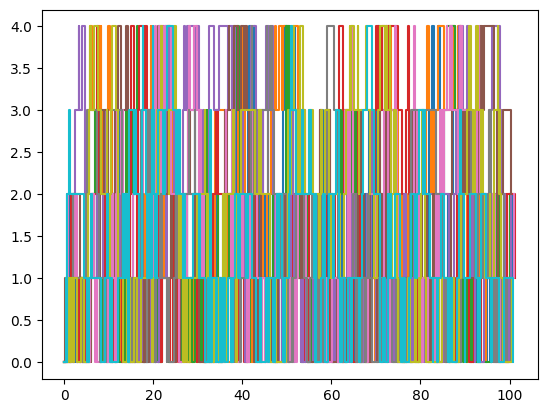

In [ ]:
# parameters
N = 10
max_time = 100
x0 = 0

times = [[]]*N
states = [[]]*N

for i in range(N):
  t,s=CtmcSimulation(A,x0,max_time)
  plt.plot(t,s)
  times[i].append(t)
  states[i].append(s)
  print(s)

plt.show

# Exercise 3
What is the relation between $Y_{t}$ and $X_{t}$?

We have two processes: a discrete-time Markov chain (DTMC) $X_t$ and a continuous-time Markov chain (CTMC) $Y_t$. The state space of both chains is the same: {1, 2, 3, 4, 5}.

The DTMC $X_t$ has a stochastic matrix $A$, which describes the probabilities of transitioning from one state to another in one time step. In this case, $A$ is given by:
$$A = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
\frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 & 0 \\
0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 \\
0 & 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} \\
0 & 0 & 0 & 1 & 0
\end{bmatrix}$$

The CTMC $Y_t$ has a rate matrix $Q$ (let us change its name just to be clearer), which describes the rates at which the chain transitions from one state to another. In this case, $Q$ is given by:

$$Q = \begin{bmatrix}
-b & b & 0 & 0 & 0 \\
a & -(a+b) & b & 0 & 0 \\
0 & a & -(a+b) & b & 0 \\
0 & 0 & a & -(a+b) & b \\
0 & 0 & 0 & a & -a
\end{bmatrix}$$

The relation between the two processes is that $X_t$ is a discrete-time approximation of $Y_t$. We can easily see that we can obtain Q from A executing the following step:

- Define a time interval $\Delta t$.
- For each transition in the DTMC, calculate the transition probability per unit time, i.e., the rate $a_{i,j}$ of going from state $i$ to state $j$ in $\Delta t$.
- Calculate the diagonal elements of the rate matrix $Q$ as $q_{i,i} = -\sum_{j\neq i} a_{i,j}$, i.e., the negative sum of the rates leaving each state $i$.
- Fill the off-diagonal elements of $Q$ with the transition rates $a_{i,j}$.
- Multiply each row of A by the corresponding diagonal element of Q. 

This is because the diagonal elements of Q represent the negative sum of the rates of leaving each state, while the off-diagonal elements of Q represent the rates of transitioning between states.

As $\Delta t$ goes to zero, we get exactly the CTMC from the DTMC.